In [1]:
import json
import os
import argparse
import sys

import torch
from torch import nn, optim
from torch.nn import functional as F
from LSTM_cos import LSTM_cos as model

sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(""))))
import commons
import utils
from utils import load_filepaths_and_text, load_wav_to_torch

In [2]:
def audio_processing(audio_path, hps):
    audio, sr = load_wav_to_torch(audio_path)
    audio_norm = audio/ hps.data.max_wav_value
    audio_norm = audio_norm.unsqueeze(0)
    stft = commons.TacotronSTFT(hps.data.filter_length, hps.data.hop_length, 
                               hps.data.win_length, hps.data.n_mel_channels, 
                               hps.data.sampling_rate, hps.data.mel_fmin,
                               hps.data.mel_fmax)
    melspec = stft.mel_spectrogram(audio_norm)
    melspec = torch.squeeze(torch.tensor(melspec),0)
    melspec = torch.abs(melspec)
    
    frames = hps.data.slice_length
    mel_padded = torch.FloatTensor(1, hps.data.n_mel_channels, frames)
    mel_padded.zero_()
    if melspec.size(1) < frames:
        mel_padded[:, :, :melspec.size(1)] = melspec
    else : 
        mel_padded[:, :, :frames] = melspec[:, :frames]
    return mel_padded/torch.max(mel_padded)

In [3]:
saved_model_path = "/media/caijb/data_drive/autoencoder/log/kernel5_LSTM"
config_path = os.path.join(saved_model_path, "config.json")
with open(config_path,"r") as f:
        data = f.read()
config = json.loads(data)
hps = utils.HParams(**config)


checkpoint_path = utils.latest_checkpoint_path(saved_model_path)

CAC = model(input_size=hps.data.n_mel_channels, hidden_size=hps.model.hidden_size
            , num_layers=hps.model.num_layers)

CAC, _, _, _ = utils.load_checkpoint(checkpoint_path, CAC)

/media/caijb/data_drive/autoencoder/log/kernel5_LSTM/G_340.pth
INFO:root:Loaded checkpoint '/media/caijb/data_drive/autoencoder/log/kernel5_LSTM/G_340.pth' (iteration 340)


In [4]:
text_path = "/media/caijb/data_drive/data/Zeroshot/CAE_seen_test.txt"
with open(text_path, "r") as f:
    data = f.read()
    data = data.split("\n")

    
result = []
for i in data:
    i = i.split("|")
    audio_path, sid = i[0], i[1]
    print(audio_path)
    mel = audio_processing(audio_path, hps)
    vector = CAC(mel)
    vector = vector.squeeze()
    temp_vector = vector.tolist()
    temp_vector.append(int(sid))
    result.append(temp_vector)


/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0000.wav


/home/caijb/Desktop/zero_shot_glowtts/stft.py:68: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)
/home/caijb/Desktop/zero_shot_glowtts/commons.py:172: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0.0, fmax=8000.0 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  sampling_rate, filter_length, n_mel_channels, mel_fmin, mel_fmax)
/home/caijb/anaconda3/envs/pytts/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0001.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0010.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0011.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0020.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0021.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0030.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0031.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0040.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0041.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0050.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0051.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0060.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0061.wav
/media/caijb/data_drive/data/chinese/call_to_arms/call_to_arms_0

/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1250.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1251.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1260.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1261.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1270.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1271.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1280.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1281.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1290.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1291.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1300.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1301.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1310.wav
/media/caijb/data_drive/data/dutch/20000_mijlen/20000_mijlen_1311.wav
/media/caijb/data_dr

/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3125.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3126.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3135.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3136.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3145.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3146.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3155.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3156.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3165.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3166.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3175.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3176.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3185.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3186.wav
/media/caijb/data_drive/data/spanish/19demarzo/19demarzo_3195.wav
/media/cai

/media/caijb/data_drive/data/finnish/gulliverin_matkat_kaukaisilla_mailla/gulliverin_matkat_kaukaisilla_mailla_1858.wav
/media/caijb/data_drive/data/finnish/gulliverin_matkat_kaukaisilla_mailla/gulliverin_matkat_kaukaisilla_mailla_1859.wav
/media/caijb/data_drive/data/finnish/gulliverin_matkat_kaukaisilla_mailla/gulliverin_matkat_kaukaisilla_mailla_1868.wav
/media/caijb/data_drive/data/finnish/gulliverin_matkat_kaukaisilla_mailla/gulliverin_matkat_kaukaisilla_mailla_1869.wav
/media/caijb/data_drive/data/finnish/gulliverin_matkat_kaukaisilla_mailla/gulliverin_matkat_kaukaisilla_mailla_1878.wav
/media/caijb/data_drive/data/finnish/gulliverin_matkat_kaukaisilla_mailla/gulliverin_matkat_kaukaisilla_mailla_1879.wav
/media/caijb/data_drive/data/finnish/gulliverin_matkat_kaukaisilla_mailla/gulliverin_matkat_kaukaisilla_mailla_1888.wav
/media/caijb/data_drive/data/finnish/gulliverin_matkat_kaukaisilla_mailla/gulliverin_matkat_kaukaisilla_mailla_1889.wav
/media/caijb/data_drive/data/finnish/gul

/media/caijb/data_drive/data/french/lesmis/lesmis_2696.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2697.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2706.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2707.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2716.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2717.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2726.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2727.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2736.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2737.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2746.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2747.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2756.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2757.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2766.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2767.wav
/media/caijb/data_drive/data/french/lesmis/lesmis_2776.w

In [5]:
import pandas as pd

df = pd.DataFrame(result)
df.to_csv("./result_seen.csv")

In [6]:
import matplotlib.pyplot as plt
df.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,0.020390,-0.002653,0.015862,-0.068147,0.060460,-0.124908,0.048077,0.017676,0.054917,-0.018482,...,-0.049878,0.036379,-0.115341,0.041122,0.011019,-0.025034,0.033607,0.121896,-0.035782,125
1,0.099279,0.041425,0.120703,-0.014012,0.057213,-0.029623,0.001512,0.036205,-0.094063,-0.033410,...,-0.093428,0.025290,-0.047709,-0.044797,-0.016377,-0.028036,-0.039998,-0.033130,-0.014738,125
2,0.040329,0.022266,0.080155,0.020343,0.053556,0.044043,-0.019923,-0.015299,-0.070774,-0.085253,...,-0.047463,-0.031202,-0.005455,-0.021576,-0.070139,0.012048,-0.075464,0.014697,-0.031709,125
3,0.155053,0.082296,0.072948,0.094766,0.068752,0.052124,0.024829,-0.050692,-0.128761,-0.019631,...,-0.096928,0.085797,0.019495,-0.014850,-0.083271,-0.015463,0.032102,-0.040247,-0.015395,125
4,0.183752,0.013363,0.027615,0.024884,0.163399,-0.000684,0.028511,-0.054469,-0.098047,0.040386,...,-0.044409,0.083933,-0.034153,-0.038728,-0.062264,0.004903,0.013808,0.008385,0.009344,125


In [27]:
y = df[[256]]
y =y.replace(125,0)
y =y.replace(124,1)
y =y.replace(113,2)
y =y.replace(115,3)
y =y.replace(114,4)

x = df.drop([256],axis =1)

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [72]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 2)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)
x_pca= pd.DataFrame(x_pca)
x_pca['target']=y

In [73]:
markers = ['o', '^', 's', 'x','p']
name = ['jing Li', 'Bart de Leeuw','Tux', 'Harri Tapani Ylilammi', 'Gilles G.Le Blanc']
sid_list = [125, 124, 113, 115, 114]

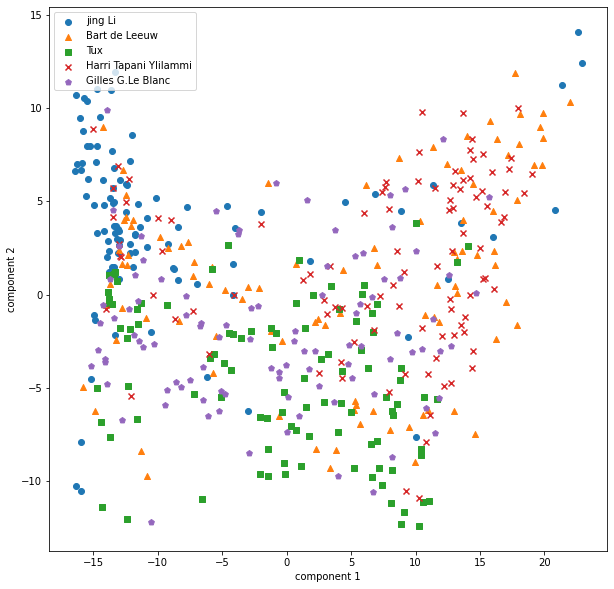

In [74]:
fig = plt.figure(figsize=(10,10))
#ax = fig.gca(projection='3d')
for i, marker in enumerate(markers) :
    x_axis = x_pca[x_pca['target']==i][0]
    y_axis = x_pca[x_pca['target']==i][1]
    
    plt.scatter(x_axis,y_axis, marker=marker, label = name[i])

plt.legend(loc='upper left')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis(n_components =2)
#scaler = StandardScaler()
#x_scaled = scaler.fit_transform(x)
lda.fit(x_scaled,y)
x_lda = lda.transform(x_scaled)
x_lda = pd.DataFrame(x_lda)
x_lda['target'] = y

/home/caijb/anaconda3/envs/pytts/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
import sklearn.externals import joblib
save_model = joblib.dump(lda,'lda.pkl')

SyntaxError: invalid syntax (3717891824.py, line 1)

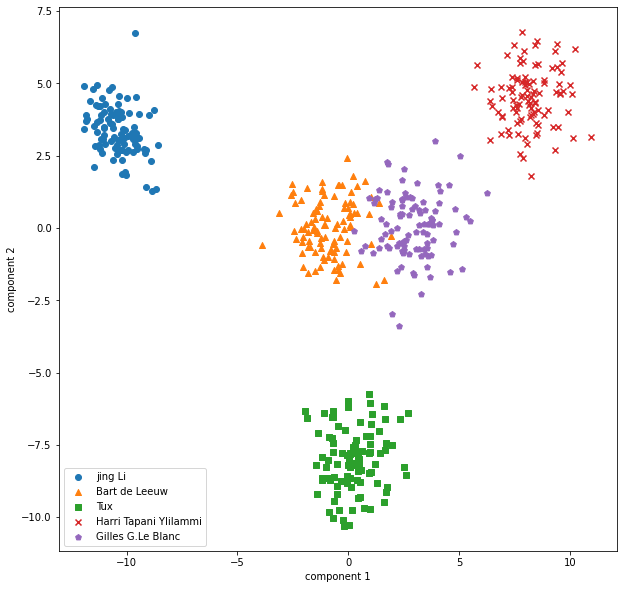

In [70]:
fig = plt.figure(figsize=(10,10))
#ax = fig.gca(projection='3d')
for i, marker in enumerate(markers) :
    x_axis = x_lda[x_lda['target']==i][0]
    y_axis = x_lda[x_lda['target']==i][1]
    plt.scatter(x_axis,y_axis, marker=marker, label = name[i])

plt.legend(loc='lower left')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()